In [1]:
!pip install gradio==3.9.0
!pip install -U httpcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of httpcore to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of httpcore to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 7.7 MB/s eta

In [2]:
pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installatio

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt

In [4]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()



170498071/170498071 [==============================] - 15s 0us/step


In [5]:
img_count = train_images.shape[0]  # Get the number of images from the array shape
print(img_count)

50000


In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

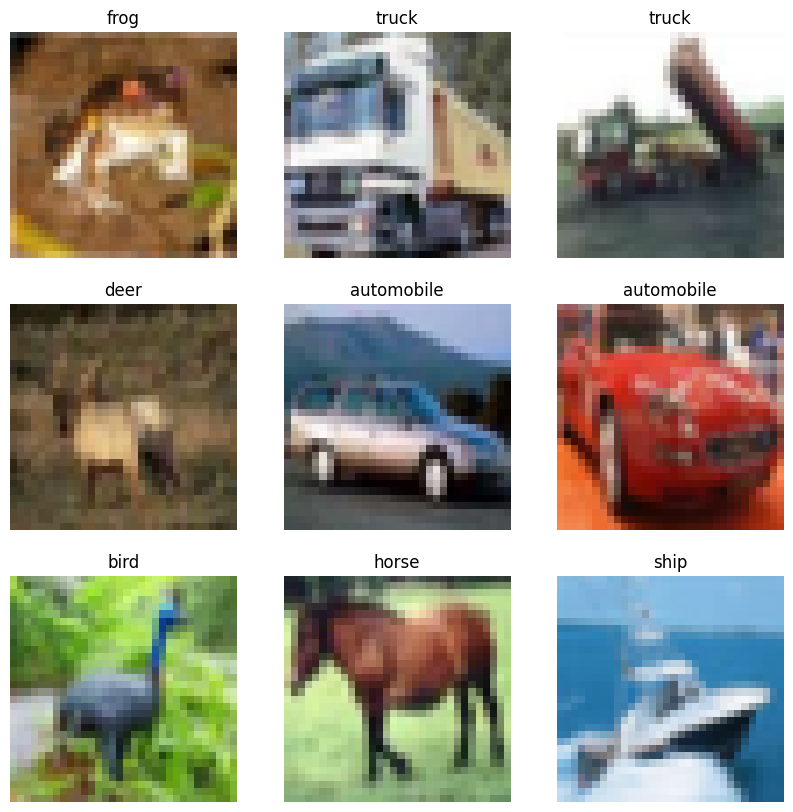

In [7]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(train_images[i].astype("uint8")) # Directly access images by index
  plt.title(class_names[train_labels[i][0]]) # Access labels by index, handle single-element array
  plt.axis("off")

In [8]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Epoch 1/30
1563/1563 [==============================] - 70s 31ms/step - loss: 1.5093 - accuracy: 0.4591 - val_loss: 1.8214 - val_accuracy: 0.4256
Epoch 2/30
1563/1563 [==============================] - 48s 30ms/step - loss: 1.0966 - accuracy: 0.6120 - val_loss: 1.2130 - val_accuracy: 0.5869
Epoch 3/30
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9451 - accuracy: 0.6675 - val_loss: 1.4621 - val_accuracy: 0.5645
Epoch 4/30
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8632 - accuracy: 0.6983 - val_loss: 1.2470 - val_accuracy: 0.5958
Epoch 5/30
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7927 - accuracy: 0.7210 - val_loss: 1.0316 - val_accuracy: 0.6335
Epoch 6/30
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7425 - accuracy: 0.7386 - val_loss: 0.8922 - val_accuracy: 0.7061
Epoch 7/30
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6974 - accuracy: 0.7549 - val_loss: 0.8602 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


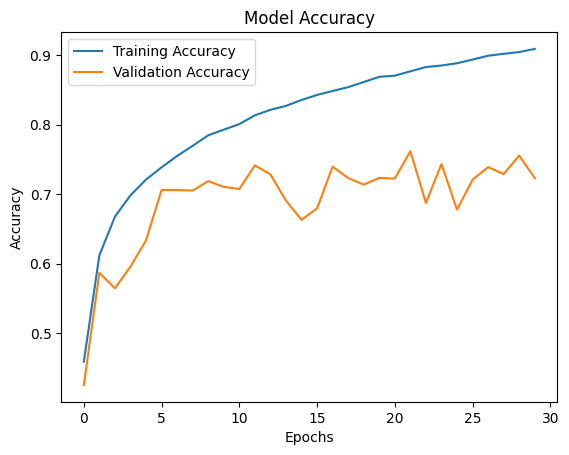

In [10]:
# Define the ResNet-164 building block
def resnet_block(input, filters, kernel_size=3, stride=1, activation='relu'):
    shortcut = input
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    if shortcut.shape[-1] != filters:  # Adjust the shortcut for dimensionality
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride)(shortcut)
    x = layers.add([x, shortcut])
    x = layers.Activation(activation)(x)
    return x

# Define the ResNet-164 model
def build_resnet164(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(16, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 18 blocks for ResNet-164
    for _ in range(18):
        x = resnet_block(x, 16)

    x = layers.AveragePooling2D((8, 8))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, x)
    return model

# Build the model
resnet164_model = build_resnet164()

# Compile the model
resnet164_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
epochs = 30
history = resnet164_model.fit(train_images, train_labels,
                               validation_data=(test_images, test_labels),
                               epochs=epochs)

# Save the model
resnet164_model.save('resnet164_model.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()




In [ ]:
import cv2

def predict_image(img):
    # Resize the image using OpenCV (cv2)
    img_resized = cv2.resize(img, (32, 32)) / 255.0  # Resize and normalize
    img_reshaped = img_resized.reshape(-1, 32, 32, 3)  # Reshape for the model

    prediction = resnet164_model.predict(img_reshaped)[0]

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    return {class_names[i]: float(prediction[i]) for i in range(10)}


# Create Gradio interface
inputs = gr.inputs.Image(shape=(32, 32))  # Input shape for CIFAR-10
outputs = gr.outputs.Label(num_top_classes=5)

iface = gr.Interface(fn=predict_image, inputs=inputs, outputs=outputs)
iface.launch(debug=True, share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.9, however version 4.29.0 is available, please upgrade.
--------
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Could not create share link, please check your internet connection.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 19ms/step
